In [ ]:
#! pip install pandas
#! conda install -c anaconda pandas

# Fontes de dados

 - Kaggle
   - UCI
   - Google Dataset
   - Dados.gov
   - Wikipedia

# Importação

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Pandas - dic - lista
dic = {'c1':[1], 'c2':[2], 'c3':[3]}

df = pd.DataFrame(dic)
df

,c1,c2,c3
0,1,2,3


In [ ]:
#Numpy - numerica - array -matriz
data = np.array([[1, 2, 3]])
columns = ['c1', 'c2', 'c3']
df = pd.DataFrame(data = data, columns = columns)
df

In [ ]:
#Nome das colunas
df.columns

In [ ]:
#Valores das colunas
df.values

In [ ]:
#Informações
df.info()

# Análise de Empréstimos para Clientes

In [ ]:
base = pd.read_csv('/content/clientes.csv')
base

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


## 1 .Visão geral

In [ ]:
# 5 primeiros clientes
base.head()

In [ ]:
#calda - 5 ultimos clientes
base.tail()

In [ ]:
#Informação
base.info()

In [ ]:
#Descrição da base de dados
base.describe()

In [ ]:
base.loc[base['renda'] >= 10000, 'dependentes']

In [ ]:
base.loc[base['renda'] > 10000]

### 2. Limpeza dos dados

#### Total de dados faltantes em uma coluna

In [ ]:
#Mostrar os valores Nan
# base['sexo'].isnull().sum() == > número de registro faltantes

base.loc[base['sexo'].isnull()] #Exibir os clientes na Base


In [ ]:
#Mostra por colunas - Valores NaN
base.isnull().sum()

## Exibir linhas com valores faltantes

In [ ]:
base[base.isnull().any(axis=1)]

#### Remover linhas e colunas que contenham valores nulos

In [ ]:
base.dropna(subset=['sexo'])

## Remover linhas e colunas

In [ ]:
#remover linhas
base.drop(labels=[0,1,2], axis=0)

In [ ]:
#remover as colunas
base.drop(labels=['cod_cliente', 'historico_credito'], axis=1)

## Excluir valores duplicados

In [ ]:
base['renda'].drop_duplicates()

## Substituindo valores

In [ ]:
base['sexo'] = base['sexo'].replace('Male',1)
base['sexo'] = base['sexo'].replace('Female',0)

base

#Trocar o estado civil - casado ou solteiro

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,1,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [ ]:
base['estado_civil'] = base['estado_civil'].replace('Yes','Casado')
base['estado_civil'] = base['estado_civil'].replace('No','Solteiro')

base

### 3. Análise univariada

In [ ]:
base['renda'].sum()

In [ ]:
base['renda'].mean()

In [ ]:
base['renda'].max()

In [ ]:
base['sexo'].unique()

### 3.1 Plots

In [ ]:
#Gráfico'
base['renda'].plot(title='Renda', xlabel='index',ylabel='Renda')

In [ ]:
base[['sexo']].value_counts().plot.bar()

#### Distribuição

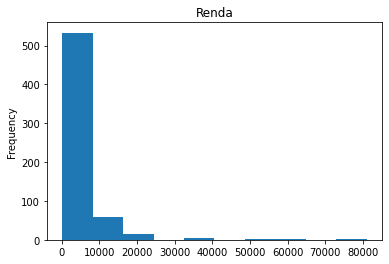

In [ ]:
base['renda'].plot(kind='hist',
                   title='Renda', xlabel='index',ylabel='Renda')

In [ ]:
base['renda'].plot(kind='box',
                   title='Renda', xlabel='index',ylabel='Renda')

In [ ]:
base[['renda']].boxplot()

## BASE 02

In [ ]:
lotes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
leitura = [6, 24, 12, 11, 34, 32, 28, 19, 31, 22, 29, 58, 15, 5, 17, 25]
df = pd.DataFrame({'lotes':lotes, 'leitura':leitura})
df

In [ ]:
df['leitura'].sort_values()

In [ ]:
df['leitura'].plot(kind='box', ylabel='leitura')